# 3. Decision Tree & Random Forest Implementation in python

We will use Decision Tree & Random Forest in Predicting the attrition of your valuable employees.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [2]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Exploratory Data Analysis

<AxesSubplot:xlabel='Attrition', ylabel='count'>

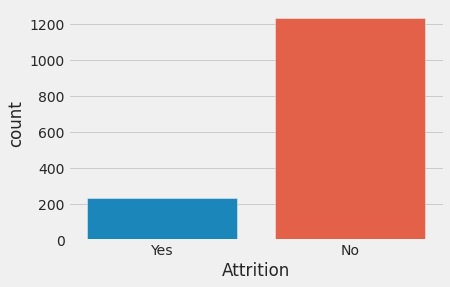

In [3]:
sns.countplot(x='Attrition', data=df)

In [4]:
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)

categorical_col = []
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique()) <= 50:
        categorical_col.append(column)
        
df['Attrition'] = df.Attrition.astype("category").cat.codes

# Data Processing

In [52]:
X_train.shape

(1029, 30)

In [5]:
categorical_col.remove('Attrition')

In [6]:
# Transform categorical data into dummies
# categorical_col.remove("Attrition")
# data = pd.get_dummies(df, columns=categorical_col)
# data.info()
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
for column in categorical_col:
    df[column] = label.fit_transform(df[column])

In [7]:
from sklearn.model_selection import train_test_split

X = df.drop('Attrition', axis=1)
y = df.Attrition

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
np.save('../data/Attrition/X_train', X_train)
np.save('../data/Attrition/X_test', X_test)
np.save('../data/Attrition/y_train', y_train)
np.save('../data/Attrition/y_test', y_test)

# Applying Tree & Random Forest algorithms

In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

## 1. Decision Tree Classifier

**Decision Tree parameters:**
- `criterion`: The function to measure the quality of a split. Supported criteria are "`gini`" for the Gini impurity and "`entropy`" for the information gain.
***
- `splitter`: The strategy used to choose the split at each node. Supported strategies are "`best`" to choose the best split and "`random`" to choose the best random split.
***
- `max_depth`: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than `min_samples_split` samples.
***
- `min_samples_split`: The minimum number of samples required to split an internal node.
***
- `min_samples_leaf`: The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least ``min_samples_leaf`` training samples in each of the left and right branches.  This may have the effect of smoothing the model, especially in regression.
***
- `min_weight_fraction_leaf`: The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.
***
- `max_features`: The number of features to consider when looking for the best split.
***
- `max_leaf_nodes`: Grow a tree with ``max_leaf_nodes`` in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.
***
- `min_impurity_decrease`: A node will be split if this split induces a decrease of the impurity greater than or equal to this value.
***
- `min_impurity_split`: Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf.

In [9]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    853.0  176.0       1.0     1029.0        1029.0
_______________________________________________
Confusion Matrix: 
 [[853   0]
 [  0 176]]

Test Result:
Accuracy Score: 77.78%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.887363   0.259740  0.777778    0.573551      0.800549
recall       0.850000   0.327869  0.777778    0.588934      0.777778
f1-score     0.868280   0.289855  0.777778    0.579067      0.788271
support    380.000000  61.000000  0.777778  441.000000    441.000000
_______________________________________________
Conf

## 2. Decision Tree Classifier Hyperparameter tuning

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}


tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best paramters: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 10, 'min_samples_split': 2, 'splitter': 'best'})
Train Result:
Accuracy Score: 88.82%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.906388    0.752066  0.888241     0.829227      0.879993
recall       0.964830    0.517045  0.888241     0.740938      0.888241
f1-score     0.934696    0.612795  0.888241     0.773745      0.879638
support    853.000000  176.000000  0.888241  1029.000000   1029.000000
_______________________________________________
Confusion Matrix: 
 [[823  30]
 [ 85  91]]

Test Result:
Accuracy Score: 84.35%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.887781   0.400000  0.843537    0.643890      0.820310
recall  

### Visualization of a tree

In [11]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot
from utils import *

feature_names = list(df.columns)
feature_names.remove("Attrition")

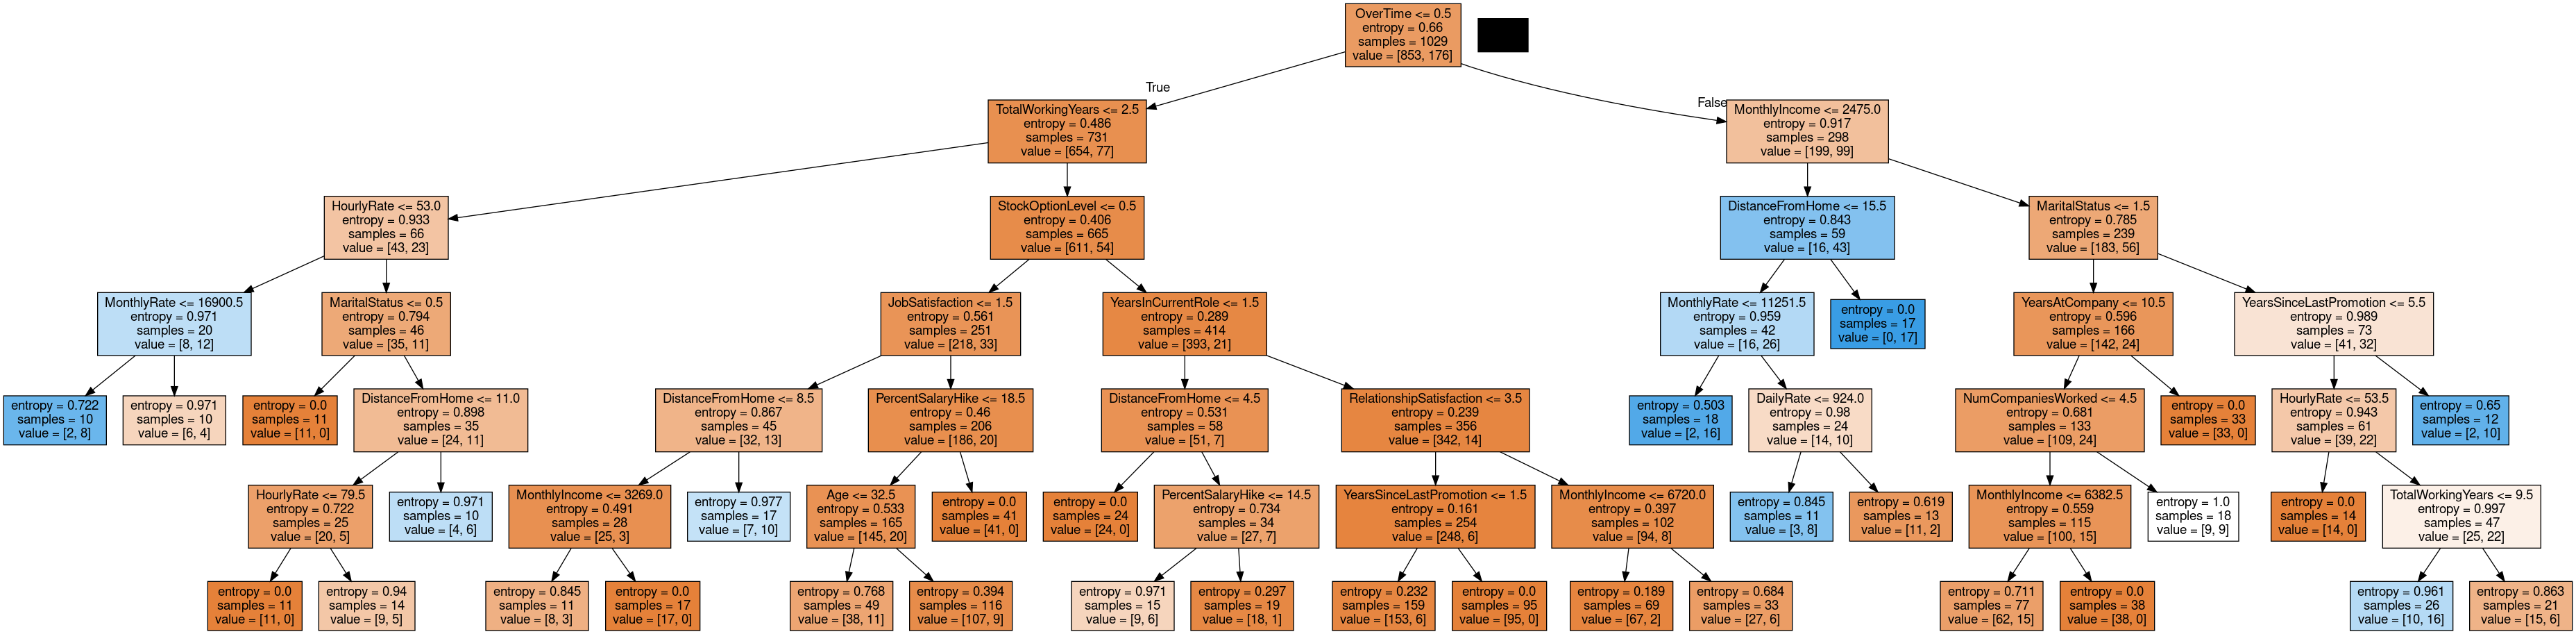

In [12]:
dot_data = StringIO()
export_graphviz(tree_clf, out_file=dot_data, feature_names=feature_names, filled=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

# 3. Random Forest

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

- **Random forest algorithm parameters:**
- `n_estimators`: The number of trees in the forest.
*** 
- `criterion`: The function to measure the quality of a split. Supported criteria are "`gini`" for the Gini impurity and "`entropy`" for the information gain.
***
- `max_depth`: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than `min_samples_split` samples.
***
- `min_samples_split`: The minimum number of samples required to split an internal node.
***
- `min_samples_leaf`: The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least ``min_samples_leaf`` training samples in each of the left and right branches.  This may have the effect of smoothing the model, especially in regression.
***
- `min_weight_fraction_leaf`: The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.
***
- `max_features`: The number of features to consider when looking for the best split.
***
- `max_leaf_nodes`: Grow a tree with ``max_leaf_nodes`` in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.
***
- `min_impurity_decrease`: A node will be split if this split induces a decrease of the impurity greater than or equal to this value.
***
- `min_impurity_split`: Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf.
***
- `bootstrap`: Whether bootstrap samples are used when building trees. If False, the whole datset is used to build each tree.
***
- `oob_score`: Whether to use out-of-bag samples to estimate the generalization accuracy.

In [45]:
def get_tree_df(tree_clf):
    n_nodes = tree_clf.tree_.node_count
    children_left = tree_clf.tree_.children_left
    children_right = tree_clf.tree_.children_right
    features = tree_clf.tree_.feature
    thresholds = tree_clf.tree_.threshold

    node_depths = np.zeros(shape=n_nodes, dtype=np.int64)
    is_leaves = np.zeros(shape=n_nodes, dtype=bool)
    stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
    while len(stack) > 0:
        node_id, depth = stack.pop()
        node_depths[node_id] = depth

        is_split_node = children_left[node_id] != children_right[node_id]
        if is_split_node:
            stack.append((children_left[node_id], depth + 1))
            stack.append((children_right[node_id], depth + 1))
        else:
            is_leaves[node_id] = True


    pair = []
    rows = []
    for i in range(n_nodes):
        node_left = children_left[i]
        node_right = children_right[i]
        feature = features[i]
        feature_name = feature_names[features[i]]
        threshold = thresholds[i]
        node_depth = node_depths[i]
        is_leave = is_leaves[i]
        row = {
            'node_id': i,
            'node_depth': node_depth,
            'feature': feature,
            'feature_name': feature_name,
            'threshold': threshold,
            'is_leave': is_leave,
            'node_left': node_left,
            'node_right': node_right,
        }
        rows.append(row)
    tree_df = pd.DataFrame(rows)
    return tree_df


def get_name_node(row):
    name = f'{row.feature_name}_{row.name}_{row.node_depth}_{row.threshold}'
    return name

def extract_positive_pair(tree_df):
    
    pairs = []
    edge_pairs = []
    feat_pairs = []
    df = tree_df.set_index('node_id')
    for node_id, row in df.iterrows():
        if not row.is_leave:
            node_left = df.loc[row.node_left]
            node_right = df.loc[row.node_right]

            edge_pairs.append([get_name_node(row), get_name_node(node_left)])
            edge_pairs.append([get_name_node(row), get_name_node(node_right)])

    features = df.feature.unique()
    for feature in features:
        feat_df = df[(~df.is_leave)&(df.feature==feature)]
        for i in range(len(feat_df)):
            for j in range(i + 1, len(feat_df)):
                row = feat_df.iloc[i]
                row2 = feat_df.iloc[j]
                feat_pairs.append([get_name_node(row), get_name_node(row2)])

    # print('feat_pairs', len(feat_pairs))
    # print('edge_pairs', len(edge_pairs))
    pairs = edge_pairs + feat_pairs
    
    
    return pairs, edge_pairs, feat_pairs

def write_pair_to_file(pairs, edge_pairs, feat_pairs, dst):
    filename_all = os.path.join(dst, 'data_closure_feat.tsv')
    filename = os.path.join(dst, 'data_closure.tsv')
    filename_edge = os.path.join(dst, 'data_hierarchy.tsv')
    filename_feat = os.path.join(dst, 'data_feat.tsv')
    pd.DataFrame(pairs).to_csv(filename_all, index=None ,header=None, sep='\t')
    # pd.DataFrame(edge_pairs).to_csv(filename, index=None ,header=None, sep='\t')
    # pd.DataFrame(edge_pairs).to_csv(filename_edge, index=None ,header=None, sep='\t')
    # pd.DataFrame(feat_pairs).to_csv(filename_feat, index=None ,header=None, sep='\t')

In [35]:
from sklearn.ensemble import RandomForestClassifier

hyper_params = {
    'max_depth': 6,
}
hyper_params = {
    'max_depth': 6,
}
rf_clf = RandomForestClassifier(n_estimators=35, **hyper_params)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 91.06%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.903499    0.988372  0.910593     0.945936      0.918016
recall       0.998828    0.482955  0.910593     0.740891      0.910593
f1-score     0.948775    0.648855  0.910593     0.798815      0.897477
support    853.000000  176.000000  0.910593  1029.000000   1029.000000
_______________________________________________
Confusion Matrix: 
 [[852   1]
 [ 91  85]]

Test Result:
Accuracy Score: 86.62%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.870670   0.625000  0.866213    0.747835      0.836688
recall       0.992105   0.081967  0.866213    0.537036      0.866213
f1-score     0.927429   0.144928  0.866213    0.536178      0.819192
support    380.000000  61.000000  0.866213  441.000000    441.

In [56]:
import numpy as np
import joblib
for i, tree_clf in enumerate(rf_clf.estimators_):
    tree_df = get_tree_df(tree_clf)
    pairs, edge_pairs, feat_pairs = extract_positive_pair(tree_df)
    exp_data = f'../data/rf_Attrition/{i:03d}'
    os.makedirs(exp_data, exist_ok=True)
    write_pair_to_file(pairs, edge_pairs, feat_pairs, exp_data)


In [53]:
tree_clf = clf = rf_clf.estimators_[0]
pairs, edge_pairs, feat_pairs = extract_positive_pair(tree_df)


In [39]:
joblib.dump(rf_clf, "my_random_forest.joblib")

['my_random_forest.joblib']

In [48]:
loaded_rf = joblib.load("my_random_forest.joblib")

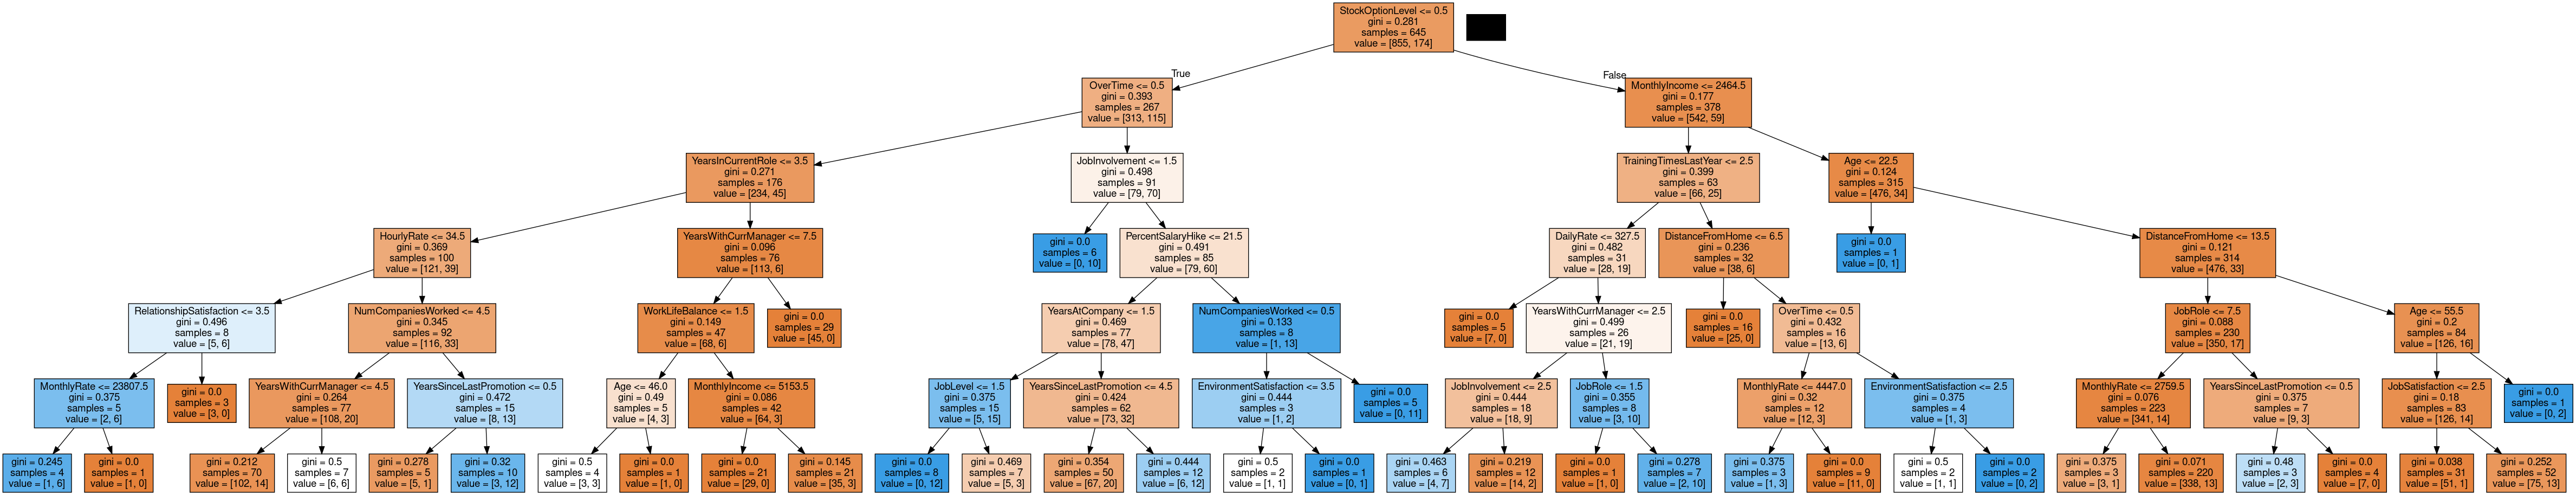

In [57]:
tree_clf = rf_clf.estimators_[0]
dot_data = StringIO()
export_graphviz(tree_clf, out_file=dot_data, feature_names=feature_names, filled=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

In [50]:
clf = rf_clf.estimators_[0]
n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold

node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
while len(stack) > 0:
    # `pop` ensures each node is only visited once
    node_id, depth = stack.pop()
    node_depth[node_id] = depth

    # If the left and right child of a node is not the same we have a split
    # node
    is_split_node = children_left[node_id] != children_right[node_id]
    # If a split node, append left and right children and depth to `stack`
    # so we can loop through them
    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True

print(
    "The binary tree structure has {n} nodes and has "
    "the following tree structure:\n".format(n=n_nodes)
)
for i in range(n_nodes):
    if is_leaves[i]:
        print(
            "{space}node={node} is a leaf node.".format(
                space=node_depth[i] * "\t", node=i
            )
        )
    else:
        print(
            "{space}node={node} is a split node: "
            "go to node {left} if X[:, {feature}] <= {threshold} "
            "else to node {right}.".format(
                space=node_depth[i] * "\t",
                node=i,
                left=children_left[i],
                feature=feature[i],
                threshold=threshold[i],
                right=children_right[i],
            )
        )

The binary tree structure has 75 nodes and has the following tree structure:

node=0 is a split node: go to node 1 if X[:, 22] <= 0.5 else to node 40.
	node=1 is a split node: go to node 2 if X[:, 18] <= 0.5 else to node 25.
		node=2 is a split node: go to node 3 if X[:, 27] <= 3.5 else to node 16.
			node=3 is a split node: go to node 4 if X[:, 9] <= 34.5 else to node 9.
				node=4 is a split node: go to node 5 if X[:, 21] <= 3.5 else to node 8.
					node=5 is a split node: go to node 6 if X[:, 16] <= 23807.5 else to node 7.
						node=6 is a leaf node.
						node=7 is a leaf node.
					node=8 is a leaf node.
				node=9 is a split node: go to node 10 if X[:, 17] <= 4.5 else to node 13.
					node=10 is a split node: go to node 11 if X[:, 29] <= 4.5 else to node 12.
						node=11 is a leaf node.
						node=12 is a leaf node.
					node=13 is a split node: go to node 14 if X[:, 28] <= 0.5 else to node 15.
						node=14 is a leaf node.
						node=15 is a leaf node.
			node=16 is a split no

## 4. Random Forest hyperparameter tuning

### a) Randomized Search Cross Validation

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf = RandomForestClassifier(random_state=42)

rf_cv = RandomizedSearchCV(estimator=rf_clf, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)

rf_cv.fit(X_train, y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

rf_clf = RandomForestClassifier(**rf_best_params)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

`Random search` allowed us to narrow down the range for each hyperparameter. Now that we know where to concentrate our search, we can explicitly specify every combination of settings to try. We do this with `GridSearchCV`, a method that, instead of sampling randomly from a distribution, evaluates all combinations we define.

### b) Grid Search Cross Validation

In [ ]:
n_estimators = [100, 500, 1000, 1500]
max_features = ['auto', 'sqrt']
max_depth = [2, 3, 5]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4, 10]
bootstrap = [True, False]

params_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf = RandomForestClassifier(random_state=42)

rf_cv = GridSearchCV(rf_clf, params_grid, scoring="f1", cv=3, verbose=2, n_jobs=-1)


rf_cv.fit(X_train, y_train)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

# Summary
In this notebook we learned the following lessons:
- Decsion tree and random forest algorithms and the parameters of each algorithm.
- How to tune hyperparameters for both Decision tree and Random Forest.
- Balance your dataset before training to prevent the tree from being biased toward the classes that are dominant. 
  - By sampling an equal number of samples from each class  
  - By normalizing the sum of the sample weights (sample_weight) for each class to the same value. 

  
## References:
- [Hyperparameter Tuning the Random Forest in Python](https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74)
- [Decision Trees](https://scikit-learn.org/stable/modules/tree.html)
- [Ensemble methods](https://scikit-learn.org/stable/modules/ensemble.html#forests-of-randomized-trees)
- [Bagging and Random Forest Ensemble Algorithms for Machine Learning](https://machinelearningmastery.com/bagging-and-random-forest-ensemble-algorithms-for-machine-learning/)